In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [300]:
stats = pd.read_csv('../../../data/education/occ_stats.csv')

def clean_array(arr):
    def clean_element(x):
        try:
            return float(str(x).replace('$', '').replace(',', ''))
        except:
            return np.nan
    arr = arr.apply(clean_element)
    return arr

stats.e14 =      clean_array(stats.e14)
stats.e24 =      clean_array(stats.e24)
stats.change =   clean_array(stats.change)
stats.openings = clean_array(stats.openings)
stats.medwage =  clean_array(stats.medwage)

stats.drop_duplicates(subset = 'name', inplace = True)

In [301]:
X = stats[stats.name.apply(lambda x: 'cashier' in x)]

In [302]:
occs = ["Zoologists and Wildlife Biologists",
"Clergy",
"Registered Nurses",
"Marriage and Family Therapists",
"Chief Executives",
"Civil Engineers",
"Fashion Designers",
"Lawyers",
"Landscape Architects",
"Childcare Workers",
"Chefs and Head Cooks",
"Physicists",
"Athletes and Sports Competitors",
"Waiters and Waitresses",
"Hunters and Trappers",
"Meter Readers, Utilities",
"Sewing Machine Operators",
"Taxi Drivers and Chauffeurs",
"Industrial Truck and Tractor Operators",
"Tax Examiners and Collectors, and Revenue Agents",
"Accountants",
"Paralegals and Legal Assistants",
"Switchboard Operators",
"Cashiers",
"Credit Analysts",
"Light Truck or Delivery Services Driver",
"Credit Authorizers",
"Loan Officers",
"Data Entry Keyers",
"Insurance Underwriters"]

lower_occs = pd.Series(map(lambda x: x.strip().lower(), occs))
stats.name = stats.name.apply(lambda x: x.strip().lower())

In [303]:
# these are the ones that have been erroneously left out
lower_occs[~lower_occs.isin(stats.name)]

14                       hunters and trappers
20                                accountants
22                      switchboard operators
25    light truck or delivery services driver
26                         credit authorizers
dtype: object

In [304]:
sb = stats[stats.name.apply(lambda x: 'switchboard' in x)]

In [305]:
accs = stats[stats.name.apply(lambda x: 'accountants' in x)]

In [306]:
truck = stats[stats.name.apply(lambda x: 'light truck' in x)]

In [307]:
cauths = stats[stats.name.apply(lambda x: 'credit authorizers' in x)]

In [308]:
use_occs = stats[stats.name.isin(lower_occs)]

In [309]:
use_occs = pd.concat((use_occs, sb, accs, truck, cauths))

In [310]:
use_occs['pct_of_employment'] = use_occs.e14 / 150539.9

In [311]:
use_occs.sort_values(by = 'pct_of_employment', ascending = False)

,name,code,e14,e24,change,pct,selfemp,openings,medwage,educ,exp,train,pct_of_employment
618,cashiers,41-2010,3437.5,3503.0,65.5,1.9,1.0,1529.5,19070,�,�,�,0.022834
427,registered nurses,29-1141,2751.0,3190.3,439.3,16.0,0.4,1088.4,66640,Bachelor's degree,None,None,0.018274
543,waiters and waitresses,35-3031,2465.1,2534.0,68.9,2.8,0.2,1255.0,18730,No formal educational credential,None,Short-term on-the-job training,0.016375
67,accountants and auditors,13-2011,1332.7,1475.1,142.4,10.7,5.9,498.0,65940,Bachelor's degree,None,None,0.008853
606,childcare workers,39-9011,1260.6,1329.9,69.3,5.5,27.1,441.3,19730,High school diploma or equivalent,None,Short-term on-the-job training,0.008374
1043,light truck or delivery services drivers,53-3033,884.7,911.9,27.3,3.1,7.6,177.8,29570,High school diploma or equivalent,None,Short-term on-the-job training,0.005877
240,lawyers,23-1011,778.7,822.5,43.8,5.6,21.3,157.7,114970,Doctoral or professional degree,None,None,0.005173
1077,industrial truck and tractor operators,53-7051,530.9,543.5,12.6,2.4,0.6,144.7,31340,No formal educational credential,None,Short-term on-the-job training,0.003527
3,chief executives,11-1011,343.4,339.4,-4.1,-1.2,23.8,58.4,173320,Bachelor's degree,5 years or more,None,0.002281
78,loan officers,13-2072,303.2,327.7,24.5,8.1,0.6,75.0,62620,Bachelor's degree,None,Moderate-term on-the-job training,0.002014


In [312]:
use_occs.rename(columns = {'code':'O*NET-SOC Code'}, inplace = True)
use_occs.to_csv("../../../survey/online_survey/survey_occs_data.csv", index = False)

In [313]:
use_occs

,name,O*NET-SOC Code,e14,e24,change,pct,selfemp,openings,medwage,educ,exp,train,pct_of_employment
3,chief executives,11-1011,343.4,339.4,-4.1,-1.2,23.8,58.4,173320,Bachelor's degree,5 years or more,None,0.002281
70,credit analysts,13-2041,69.4,73.6,4.2,6.1,�,34.3,67020,Bachelor's degree,None,None,0.000461
74,insurance underwriters,13-2053,103.4,91.6,-11.7,-11.4,�,19.5,64220,Bachelor's degree,None,Moderate-term on-the-job training,0.000687
78,loan officers,13-2072,303.2,327.7,24.5,8.1,0.6,75.0,62620,Bachelor's degree,None,Moderate-term on-the-job training,0.002014
80,"tax examiners and collectors, and revenue agents",13-2081,67.9,63.7,-4.2,-6.2,�,27.8,51120,Bachelor's degree,None,Moderate-term on-the-job training,0.000451
114,landscape architects,17-1012,22.5,23.7,1.2,5.5,18.6,4.9,64570,Bachelor's degree,None,Internship/residency,0.000149
123,civil engineers,17-2051,281.4,305.0,23.6,8.4,3.9,106.7,82050,Bachelor's degree,None,None,0.001869
164,zoologists and wildlife biologists,19-1023,21.3,22.2,0.8,4.0,1.0,6.6,58270,Bachelor's degree,None,None,0.000141
176,physicists,19-2012,18.1,19.5,1.4,7.9,0.9,4.9,109600,Doctoral or professional degree,None,None,0.000120
218,marriage and family therapists,21-1013,33.7,38.7,5.0,14.8,6.6,12.1,48040,Master's degree,None,Internship/residency,0.000224


In [153]:
use_occs

,O*NET-SOC Code,code,e14,e24,change,pct,selfemp,openings,medwage,educ,exp,train,pct_of_employment
3,chief executives,11-1011,343.4,339.4,-4.1,-1.2,23.8,58.4,173320,Bachelor's degree,5 years or more,None,0.002281
70,credit analysts,13-2041,69.4,73.6,4.2,6.1,�,34.3,67020,Bachelor's degree,None,None,0.000461
74,insurance underwriters,13-2053,103.4,91.6,-11.7,-11.4,�,19.5,64220,Bachelor's degree,None,Moderate-term on-the-job training,0.000687
78,loan officers,13-2072,303.2,327.7,24.5,8.1,0.6,75.0,62620,Bachelor's degree,None,Moderate-term on-the-job training,0.002014
80,"tax examiners and collectors, and revenue agents",13-2081,67.9,63.7,-4.2,-6.2,�,27.8,51120,Bachelor's degree,None,Moderate-term on-the-job training,0.000451
114,landscape architects,17-1012,22.5,23.7,1.2,5.5,18.6,4.9,64570,Bachelor's degree,None,Internship/residency,0.000149
123,civil engineers,17-2051,281.4,305.0,23.6,8.4,3.9,106.7,82050,Bachelor's degree,None,None,0.001869
164,zoologists and wildlife biologists,19-1023,21.3,22.2,0.8,4.0,1.0,6.6,58270,Bachelor's degree,None,None,0.000141
176,physicists,19-2012,18.1,19.5,1.4,7.9,0.9,4.9,109600,Doctoral or professional degree,None,None,0.000120
218,marriage and family therapists,21-1013,33.7,38.7,5.0,14.8,6.6,12.1,48040,Master's degree,None,Internship/residency,0.000224


# OCCUPATION COVERAGE

In [154]:
use_occs.pct_of_employment.sum()

0.10757148104921022

# TASK COVERAGE

In [476]:
tasks = pd.read_table('../../../data/databases/db15/Task Ratings.txt', delimiter = '\t')
tasks = tasks[tasks['Scale ID'] == 'IM']

In [387]:
# match tasks to names, then extract 30 occupations; "Tasks" is missing data

names = pd.read_csv('../../../data/helpers/occ_codes/names.csv')
new_tasks = tasks.merge(names, on = 'O*NET-SOC Code', how = 'inner')
new_tasks.Title = new_tasks.Title.apply(lambda x: x.lower().strip())
ntsb = new_tasks[new_tasks.Title.apply(lambda x: 'switchboard operators,' in x)]
ntlt = new_tasks[new_tasks.Title.apply(lambda x: 'light truck' in x)]
new_tasks = new_tasks[new_tasks.Title.isin(lower_occs)]
final_tasks = pd.concat((new_tasks, ntsb, ntlt))

In [339]:
# survey_codes = map(lambda x: x + ".00", use_occs['O*NET-SOC Code'])
# limited_tasks = tasks[tasks['O*NET-SOC Code'].isin(survey_codes)]

In [388]:
top5s = final_tasks.groupby('O*NET-SOC Code').head(5)
all_occ_sums = final_tasks.groupby('O*NET-SOC Code')['Data Value'].sum()
top_occ_sums = top5s.groupby('O*NET-SOC Code')['Data Value'].sum()
relative = top_occ_sums / all_occ_sums

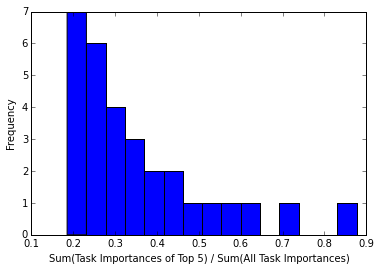

In [389]:
# relative total "importance magnitude" covered

pcts = relative.plot(kind = 'hist', bins = 15)
pcts.set_xlabel("Sum(Task Importances of Top 5) / Sum(All Task Importances)")
pcts.set_ylabel("Frequency")

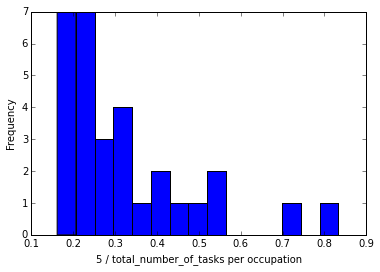

In [395]:
# histogram of the % of tasks

num_tasks = final_tasks.groupby('O*NET-SOC Code').count().N
pct_tasks = 5. / num_tasks
pct_tasks = pct_tasks.plot(kind = 'hist', bins = 15)
pct_tasks.set_xlabel("5 / total_number_of_tasks per occupation")
pct_tasks.set_ylabel("Frequency")

In [405]:
# what about the tasks with top-5's that don't cover a lot?
# If the average value of their non-top-5's differs greatly from their
# top-5's, we can be confident this is ok.

# take the average of their top 5 tasks
# compare average of non-top 5 tasks
# avg_non_top_5 / avg_top_5

# find the average of top 5s
top_5_low_covers = final_tasks.groupby('O*NET-SOC Code').head(5)
avg_top_5 = top_5_low_covers[['O*NET-SOC Code', 'Data Value']].groupby("O*NET-SOC Code").mean()

# find the average of non top 5s
not_top_5_low_covers = final_tasks[~final_tasks['Task ID'].isin(top_5_low_covers['Task ID'])]
avg_non_top_5 = not_top_5_low_covers[['O*NET-SOC Code', 'Data Value']].groupby("O*NET-SOC Code").mean()

In [415]:
avgs = pd.concat((avg_top_5, avg_non_top_5), axis = 1)
avgs.columns = 'top non_top'.split()
avgs['difference'] = (avgs.non_top - avgs.top)
avgs['difference_pct'] = -(avgs.non_top - avgs.top) / avgs.non_top

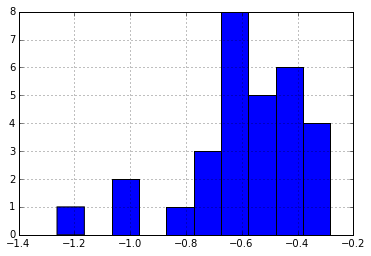

In [416]:
avgs.difference.hist()

In [462]:
gt = general_tasks = pd.read_csv("../../../data/helpers/work_activities.csv")
general_tasks = pd.read_csv("../../../data/helpers/work_activities.csv").groupby("DWA Title")['WA Name'].count()

In [463]:
from helpers.helper import *

In [471]:
dwas = gt['IWA Title'].unique()

In [486]:
task_dwas = pd.read_table('../../../data/databases/db15/Tasks to DWAs.txt', delimiter = '\t')

In [491]:
occ_dwas = task_dwas.merge(gt[['DWA Title', 'DWA ID']], on = 'DWA ID', how = 'inner')

In [502]:
for t in range(10):
    print occ_dwas.groupby("DWA Title").count().Date.sort_values(ascending = False).index[t], '\n'

Advise students on academic or career matters. 

Record operational or production data. 

Evaluate student work. 

Research topics in area of expertise. 

Record patient medical histories. 

Maintain inventories of materials, equipment, or products. 

Supervise employees. 

Clean production equipment. 

Operate cranes, hoists, or other moving or lifting equipment. 

Order materials, supplies, or equipment. 

